# BLM_3: Underwater Sound Propagation
Key characteristics of underwater sound propagation are the sound speed and the absorption of sound in sea water
## Sound speed
The speed of sound in sea water is a complicated function of temperature T, depth z, and salinity S.

A simplified formula is given by Medwin (1975)

\begin{equation}
c(T,z,S) = 1449.2 +4.6T -\Big(\frac{T}{4.26}\Big)^2 + \Big(\frac{T}{15.1}\Big)^3
+\frac{z}{62.5} 
+\Big(1.34 - \frac{T}{100}\Big)(S-35) 
\end{equation}


## Absorption
Sound energy is absorbed when propagating in sea water. 

A simple widspread formula is
\begin{equation}
a=\Big(\frac{0.12F^2}{1.32+F^2}\Big)_{B(OH)_3} + \Big(\frac{48.5F^2}{5715.4+F^2}\Big)_{MgSO_4} +(3.4\times10^{-4}F^2)_{H_2O}
\end{equation}


## Sound speed simulation
A sound speed is simulated for the Mediterranean Sea, whereby an exponential temperature decrease is assumed on top of a 13.5°C deep water temperature and a top mixed layer with constant 20°C temperture.

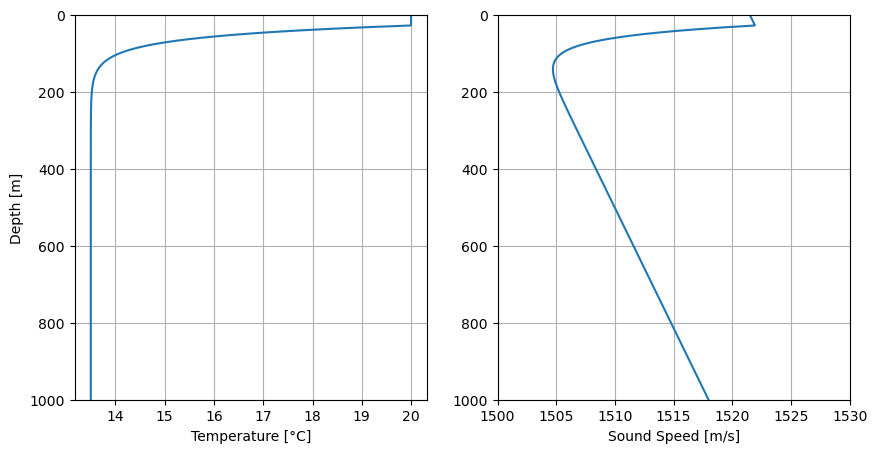

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def cv(T,z,S):
    return 1449.2 +4.6*T -(T/4.26)**2 + (T/15.1)**3+(z/62.5)+(1.34 - T/100)*(S-35) 

S = 35
z = np.arange(1000)
T = 13.5+0*z
T0 = 30
T += (T0-13.5)*np.exp(- z/30)
T=np.minimum(T,20)


fig = plt.figure("figure.figsize",[10,5])
plt.subplot(121)
plt.plot(T,z)
plt.ylim(1000,0);
plt.ylabel("Depth [m]")
plt.xlabel("Temperature [°C]")
plt.grid(True)

plt.subplot(122)
plt.plot(cv(T,z,S),z)
plt.ylim(1000,0);
plt.xlim(1500,1530)
plt.xlabel("Sound Speed [m/s]")
plt.grid(True)
plt.show()

### Observation
The sound speed profile shows two typical features
- a surface duct of about 25 m
- a sound channel with mimimum sound speed at about 140 m

## Absorption plot

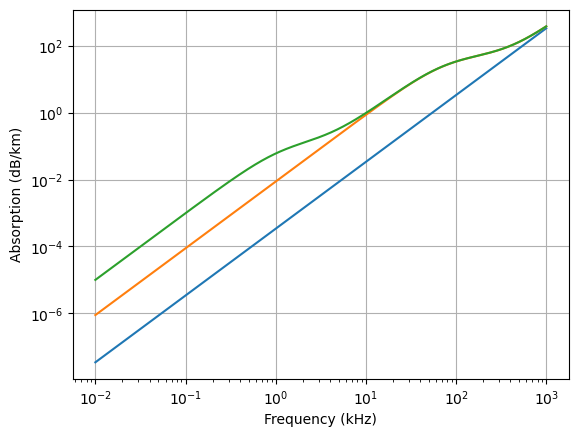

In [77]:
F=np.arange(0.01,1000,0.01)
#
F2=F*F
a0 = 3.4e-4*F2
a1 = (0.12*F2/(1.32+F2))
a2 = (48.5*F2/(5715.4+F2))

plt.loglog(F,a0)
plt.loglog(F,a0+a2)
plt.loglog(F,a0+a1+a2)
plt.grid(True)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Absorption (dB/km)")
plt.show()
